In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

### Method Descriptions:
1. train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None):
    - Randomly splits dataset in 70% training data and 30% test data.
    - Shuffles dataset before split with a fixed random seed (random_state=1).
        - This hinders all examples from class 0 and class 1 to end up in the training dataset, and the test dataset would consist of 45 examples from class 2.
        - By providing a fixed random seed for the internal pseudo-random number generator, the dataset is shuffeled prior to splitting.
        - Using such a fixed random_state ensures reproducible results.

In [3]:
iris = datasets.load_iris() # Loads dataset

X = iris.data[:, [2, 3]] # Petal length & Petal width of 150 examples
y = iris.target          # Corresponding class labels of the flowers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Method Descriptions:
1. unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None):
    - Returns the sorted unique elements of an array. There are three optional outputs in addition to the unique elements:
        - The indices of the input array that give the unique values.
        - The indices of the unique array that reconstruct the input array.
        - The number of times each unique value comes up in the input array.
2. bincount(x, weights=None, minlength=0):
    - Count number of occurrences of each value in array of non-negative ints.

In [4]:
print(f"Class Labels:       {np.unique(y)}") 
print(f"Total Label Count:  {np.bincount(y)}")
print(f"Train Label Count:  {np.bincount(y_train)}")
print(f"Test Label Count:   {np.bincount(y_test)}")

Class Labels:       [0 1 2]
Total Label Count:  [50 50 50]
Train Label Count:  [35 35 35]
Test Label Count:   [15 15 15]


### Method Descriptions:
1. StandardScaler(*, copy=True, with_mean=True, with_std=True):
    - Standardize features by removing the mean and scaling to unit variance.
    - The standard score of a sample x is calculated as:
        - $z = (x - u) / s$
            - $u$ is the mean of the training samples or zero if with_mean=False.
            - $s$ is the standard deviation of the training samples or one if with_std=False.
2. scalar.fit(X, y=None, sample_weight=None):
    - Compute the mean and std to be used for later scaling.
3. scalar.transform(X, copy=None):
    - Perform standardization by centering and scaling.
4. perceptron.fit(X, y, coef_init=None, intercept_init=None, sample_weight=None):
    - Fit linear model with Stochastic Gradient Descent.
5. perceptron.predict(X):
    - Predict class labels for samples in X.

In [5]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

perceptron = Perceptron(eta0=0.1, random_state=1)
perceptron.fit(X_train_std, y_train)

y_prediction = perceptron.predict(X_test_std)

### Method Descriptions:
1. accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None):
    - Accuracy classification score.
    - In multilabel classification, this function computes subset accuracy:
        - The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [6]:
print(f"Misclassified Examples: {(y_test != y_prediction).sum()}")
print(f"Model Accuracy: {round((accuracy_score(y_test, y_prediction)*100), 2)}%")

Misclassified Examples: 1
Model Accuracy: 97.78%


### Method Descriptions:
1. ndarray.min(axis=None, out=None, keepdims=False, initial=<no value>, where=True):
    - Return the minimum along a given axis.
2. ndarray.max(axis=None, out=None, keepdims=False, initial=<no value>, where=True):
    - Return the maximum along a given axis.
3. ListedColormap(colors, name='from_list', N=None):
    - Colormap object generated from a list of colors.
    - This may be most useful when indexing directly into a colormap, but it can also be used to generate special colormaps for ordinary mapping.
4. meshgrid(*xi, copy=True, sparse=False, indexing='xy'):
    - Return coordinate matrices from coordinate vectors.
    - Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn.
5. arange([start, ]stop, [step, ]dtype=None, *, like=None):
    - Return evenly spaced values within a given interval.
    - Values are generated within the half-open interval [start, stop) (in other words, the interval including start but excluding stop).
    - For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list.
    - When using a non-integer step, such as 0.1, the results will often not be consistent. It is better to use numpy.linspace for these cases.
6. ndarray.ravel([order]):
    - Return a flattened array.
7. ndarray.T:
    - The transposed array. (Turns row-array to column-array and vice-versa)
8. ndarray.shape:
    - Tuple of array dimensions.
    - The shape property is usually used to get the current shape of an array, but may also be used to reshape the array in-place by assigning a tuple of array dimensions to it.
    - As with numpy.reshape, one of the new shape dimensions can be -1, in which case its value is inferred from the size of the array and the remaining dimensions.
    - Reshaping an array in-place will fail if a copy is required.
9. reshape(a, newshape, order='C'):
    - Gives a new shape to an array without changing its data.
10. contourf(*args, data=None, **kwargs):
    - Plot filled contours.
11. xlim & ylim(*args, **kwargs):
    - Get or set the x or y limits of the current axes.

In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for index, lbl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == lbl, 0], y=X[y == lbl, 1], alpha=0.8, 
            c=colors[index], marker=markers[index], label=lbl, 
            edgecolor="black")
    
    # Highlight test examples
    if test_idx:
        # Plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1], c="black", edgecolor="black", 
            alpha=1.0, linewidth=1, marker="o", s=25, label="test set")

### Method Descriptions:
1. vstack(tup):
    - Stack arrays in sequence vertically (row wise).
    - This is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have been reshaped to (1,N). Rebuilds arrays divided by vsplit.
    - This function makes most sense for arrays with up to 3 dimensions.
2. hstack(tup):
    - Stack arrays in sequence horizontally (column wise).
    - This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis. Rebuilds arrays divided by hsplit.
    - This function makes most sense for arrays with up to 3 dimensions.

C:\Users\ANONYM~1\AppData\Local\Temp/ipykernel_16728/2329631292.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == lbl, 0], y=X[y == lbl, 1], alpha=0.8,


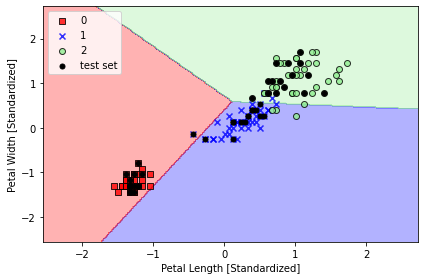

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=perceptron, test_idx=range(105, 150))
plt.xlabel("Petal Length [Standardized]")
plt.ylabel("Petal Width [Standardized]")
plt.legend(loc="upper left")
plt.tight_layout()